## objectives

- to learn to build and train a simple neural network with Keras
- to learn to follow and interpret the progress of training

In [141]:
import keras
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras.src.utils import to_categorical
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [142]:
data = load_iris()
X = data.data
y = to_categorical(data.target) # one hot encode targets

# shuffle x and y
X, y = shuffle(X, y)

# split the data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Modeling

I started off with 64 neurons in the hidden layer. However, the model quickly overfitted reaching 100% accuracy with validation and test sets.
I decided to reduce the number of neurons to 32. Additionally, I adjusted the learning rate to 0.001

In [143]:
# build the model
inputs = keras.Input(shape=(4,))
x = keras.layers.Dense(32, activation="relu")(inputs)
outputs = keras.layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="iris")

In [144]:
model.summary()

Model: "iris"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 259 (1.01 KB)

 Trainable params: 259 (1.01 KB)

 Non-trainable params: 0 (0.00 B)

In [145]:
model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

history = model.fit(X_train, y_train, epochs=20, batch_size=8, validation_split=0.2)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3039 - loss: 1.6422 - val_accuracy: 0.5417 - val_loss: 1.1146
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3025 - loss: 1.0856 - val_accuracy: 0.2083 - val_loss: 1.0430
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3116 - loss: 1.0141 - val_accuracy: 0.2083 - val_loss: 0.9657
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4544 - loss: 0.8908 - val_accuracy: 0.7083 - val_loss: 0.9070
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7665 - loss: 0.8581 - val_accuracy: 0.9167 - val_loss: 0.8099
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8026 - loss: 0.7920 - val_accuracy: 0.7500 - val_loss: 0.7399
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7282 - loss: 0.7176 - val_accuracy: 0.7500 - val_loss: 0.6840
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7371 - loss: 0.7156 - val_accuracy: 0.9167 - val_loss

#### Evaluation

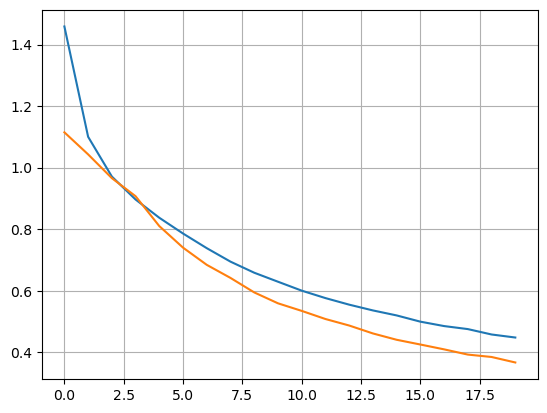

In [146]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.grid()
plt.show()

In [147]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.2f}")
print(f"Test Accuracy: {accuracy:.2f}")

Test Loss: 0.49
Test Accuracy: 0.97
